In [8]:
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle --version


Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"florahuo","key":"bed7bdc914d14364a695127d4d320240"}'}

In [10]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 May 12 21:05 kaggle.json


In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle competitions download -c codeml-challenge5 --force

 92% 130M/141M [00:02<00:00, 49.0MB/s]
100% 141M/141M [00:02<00:00, 50.3MB/s]


In [14]:
from zipfile import ZipFile
file_name = 'codeml-challenge5.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [15]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [16]:
# set your own dir for trainset and testset
train_dir = './train_images/train_images/' 
test_dir = './test_images/content/data/test_imagess/'

In [17]:
# One Hot Encode training data labels
train_labels = np.genfromtxt("./train_label.txt",delimiter='\n',dtype=None,encoding=None)

from keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder

# Encode target labels with beluw between 0 and n_classes-1. 

label_encoder = LabelEncoder() # Create an instance

# Fit label encoder (One-Hot Encode) the labels as a vector
vector = label_encoder.fit_transform(train_labels)

#Convert to categorical
y_train = to_categorical(vector) #Shape: (49999, 10) 

In [18]:
print(y_train.shape)
print(y_train[0])
train_labels[:10] #same as the original txt file

(49999, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


array(['truck', 'airplane', 'frog', 'deer', 'truck', 'ship', 'frog',
       'cat', 'bird', 'airplane'], dtype='<U10')

In [19]:
import cv2
from PIL import Image
import keras
from natsort import natsorted, ns
SIZE = 32
x_train = []
x_test = []

# Output should be two lists of 50000 32x32 images with each pixel being an RGB value. 

for image_name in natsorted(os.listdir(train_dir)):
  if (len(image_name) > 3):
    if (image_name.split('.')[1] == 'png'):
      image = cv2.imread(train_dir + image_name)
      image = Image.fromarray(image, 'RGB')
      image = image.resize((SIZE, SIZE))
      x_train.append(np.array(image))

print('Loaded train set')

for image_name in natsorted(os.listdir(test_dir)):
  if (len(image_name) > 3):
    if (image_name.split('.')[1] == 'png'):
      image = cv2.imread(test_dir + image_name)
      image = Image.fromarray(image, 'RGB')
      image = image.resize((SIZE, SIZE))
      x_test.append(np.array(image))

print('Loaded test set')

Loaded train set
Loaded test set


In [20]:
from keras.utils import normalize

X_train = normalize(x_train, axis = 1)
X_test = normalize(x_test, axis = 1)


In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train[0].shape)

(49999, 32, 32, 3)
(10000, 32, 32, 3)
(10,)


In [22]:
from sklearn.model_selection import train_test_split

Xtrain, Xvalidation, Ytrain, Yvalidation = train_test_split(X_train, y_train, test_size=9999, random_state = 0)

In [23]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xvalidation.shape)
print(Yvalidation.shape)

(40000, 32, 32, 3)
(40000, 10)
(9999, 32, 32, 3)
(9999, 10)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


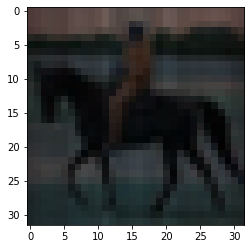

In [24]:
plt.imshow(Xvalidation[199])
print(Yvalidation[199])

In [25]:
from tensorflow.keras.models import Sequential

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.6))

model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.6))

#model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
#model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(keras.layers.MaxPooling2D(2,2))
#model.add(keras.layers.Dropout(0.6))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [26]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [35]:
history = model.fit(Xtrain, Ytrain, batch_size = 2048, epochs=100, verbose=1, validation_data=(Xvalidation, Yvalidation))

Epoch 1/100
20/20 [==============================] - 11s 544ms/step - loss: 0.5922 - accuracy: 0.7895 - val_loss: 0.5702 - val_accuracy: 0.7977
Epoch 2/100
20/20 [==============================] - 11s 552ms/step - loss: 0.5649 - accuracy: 0.7978 - val_loss: 0.5605 - val_accuracy: 0.8054
Epoch 3/100
20/20 [==============================] - 11s 561ms/step - loss: 0.5651 - accuracy: 0.7992 - val_loss: 0.5576 - val_accuracy: 0.8055
Epoch 4/100
20/20 [==============================] - 11s 575ms/step - loss: 0.5664 - accuracy: 0.7987 - val_loss: 0.5579 - val_accuracy: 0.8046
Epoch 5/100
20/20 [==============================] - 12s 583ms/step - loss: 0.5590 - accuracy: 0.8018 - val_loss: 0.5597 - val_accuracy: 0.8048
Epoch 6/100
20/20 [==============================] - 11s 569ms/step - loss: 0.5593 - accuracy: 0.8003 - val_loss: 0.5583 - val_accuracy: 0.8078
Epoch 7/100
20/20 [==============================] - 11s 566ms/step - loss: 0.5562 - accuracy: 0.8011 - val_loss: 0.5620 - val_accuracy:

In [36]:
model.evaluate(Xvalidation, Yvalidation, verbose=0)

[0.5225160121917725, 0.8203820586204529]

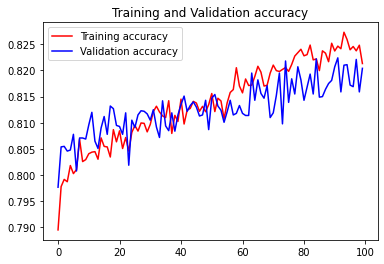

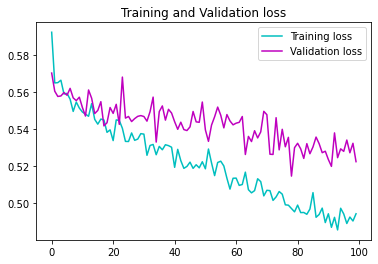

<Figure size 432x288 with 0 Axes>

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'c', label='Training loss')
plt.plot(epochs, val_loss, 'm', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [38]:
import pandas as pd

# Predict classes of X_test images (one-hot encoded format)
test_pred = model.predict(X_test)
test_pred_labels = [np.argmax(r) for r in test_pred]

# Generate data with specified format and convert test_pred to int
data = {'id':       list(range(0, len(X_test), 1)),
        'classes':  test_pred_labels}

# Generate the dataframe
df = pd.DataFrame(data, columns = ['id', 'classes'])

# Export df to csv
df.to_csv("./prediction_submission.csv", index = False)

print("finished")

finished
